# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import libraries to be used
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
#load the twitter archive data
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#check data info
tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#download image predictions file
img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_url)

#create the file for image predictions
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#import the tsv file into a pandas dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#check image predictions info
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Twitter API configuration
if os.path.isfile('tweet-json.txt'):
    print("The dataset has already been downloaded and is written in tweet-json.txt file. Data will now be extracted from the file")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

    consumer_key = ''
    consumer_secret = ''
    access_token = ''
    access_secret = ''

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = tweets_archive.tweet_id.values
    len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)



The dataset has already been downloaded and is written in tweet-json.txt file. Data will now be extracted from the file


In [7]:
# view the content of the tweet-json file
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
    
tweets[0]     

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [8]:
#create a data list from the twitter json data
tweets_list = []
for json_data in tweets:
    tweets_list.append({'tweet_id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count']),
                       'source' : str(json_data['source']),
                       'retweeted' : int(json_data['retweeted'])})

#create a pandas dataframe with the list from the json data
tweets_json_data = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count' , 'favorite_count',
                                                       'source', 'retweeted']) 


In [9]:
#view the tweets_json dataframe
tweets_json_data.head()

,tweet_id,retweet_count,favorite_count,source,retweeted
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",0
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",0
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r...",0
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r...",0
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r...",0


## Assessing Data

<h3> Visual Assessment </h3>


In [10]:
#twitter archive dataset
tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
#image predictions dataset
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
#twitter json dataset
tweets_json_data

,tweet_id,retweet_count,favorite_count,source,retweeted
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",0
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",0
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r...",0
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r...",0
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r...",0
5,891087950875897856,3261,20562,"<a href=""http://twitter.com/download/iphone"" r...",0
6,890971913173991426,2158,12041,"<a href=""http://twitter.com/download/iphone"" r...",0
7,890729181411237888,16716,56848,"<a href=""http://twitter.com/download/iphone"" r...",0
8,890609185150312448,4429,28226,"<a href=""http://twitter.com/download/iphone"" r...",0
9,890240255349198849,7711,32467,"<a href=""http://twitter.com/download/iphone"" r...",0


<h3>Programmatic Assessment</h3>

In [13]:
#twitter archive dataset
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
tweets_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
tweets_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#check for missing values
tweets_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
#check for duplicates in the twitter archive table
len(tweets_archive[tweets_archive['tweet_id'].duplicated()])

0

In [18]:
#check the names
tweets_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Daisy         7
Toby          7
Buddy         7
an            7
Jack          6
Bella         6
Milo          6
Dave          6
Oscar         6
Jax           6
Leo           6
Stanley       6
Koda          6
Rusty         6
Scout         6
Sunny         5
           ... 
Bluebert      1
Cedrick       1
Bode          1
Rilo          1
Goliath       1
Kobe          1
Jeb           1
Staniel       1
Brudge        1
Harry         1
Mollie        1
Ole           1
Rontu         1
Dietrich      1
Zuzu          1
Lance         1
Biden         1
Rolf          1
Apollo        1
Bradlay       1
DayZ          1
Carper        1
Holly         1
Ziva          1
Chaz          1
Durg          1
Craig         1
Gin           1
Jaspers       1
Cheryl        1
Name: name, Length: 957,

In [19]:
#sort names to see if there are case issues
tweets_archive['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [20]:
#check source column
tweets_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
#image predictions table
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#check for duplicate images
len(image_predictions[image_predictions['jpg_url'].duplicated()])

66

In [23]:
#twitter json table
tweets_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
source            2354 non-null object
retweeted         2354 non-null int64
dtypes: int64(4), object(1)
memory usage: 92.0+ KB


In [24]:
#check source column
tweets_json_data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
#check retweeted column
tweets_json_data['retweeted'].value_counts()

0    2354
Name: retweeted, dtype: int64

### Quality issues
<h4> Twitter archive table </h4>
<ul>
    <li>change the timestamp datatype to datetime datatype and tweet_id datatype to string datatype </li>
    <li>some names in the name column are invalid names (like a, an, None etc)</li>
    <li>remove retweets by dropping columns with 'retweet' status like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp variables</li>
    <li>remove 'html' from the 'source' column for easy understanding</li>
    <li>rating_denominator and rating_numerator have invalid values i.e very high values that are considered inaccurate </li>
    <li>drop columns that would not be needed </li>
 
    
</ul>

<h4> Image predictions table </h4>

<ul>
    <li>drop img_num column</li>
    <li>duplicate enteries in jpg_url column</li>
    <li>change tweet_id datatype to string</li>
</ul>

<h4> Twitter json (API) table</h4>
<ul>
    <li>change tweet_id datatype to string</li>
    <li>remove 'html' from 'source' column for better understanding </li>
    <li>remove 'retweeted' column </li>
</ul>

### Tidiness issues
<ul>
    <li>combine the 4 dog stage columns; doggo,floofer, pupper, puppo columns into one single column named dog class</li>
    <li>merge the tweets_archive table, image_predictions table and tweet_json_data table into one table</li>
</ul>

## Cleaning Data


In [26]:
# Make copies of original pieces of data
tweets_archive_clean = tweets_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_json_clean = tweets_json_data.copy()

### Issue #1: Quality

### Twitter archive table

In [27]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define
change the timestamp to datetime datatype and tweet_id to string datatype

#### Code

In [28]:
#convert tweet_id datatype string datatype
tweets_archive_clean.tweet_id = tweets_archive_clean.tweet_id.astype(str)

In [29]:
#convert timestamp datatype to datetime datatype
tweets_archive_clean.timestamp = pd.to_datetime(tweets_archive_clean.timestamp)

#### Test

In [30]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [31]:
tweets_archive_clean['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Daisy         7
Toby          7
Buddy         7
an            7
Jack          6
Bella         6
Milo          6
Dave          6
Oscar         6
Jax           6
Leo           6
Stanley       6
Koda          6
Rusty         6
Scout         6
Sunny         5
           ... 
Bluebert      1
Cedrick       1
Bode          1
Rilo          1
Goliath       1
Kobe          1
Jeb           1
Staniel       1
Brudge        1
Harry         1
Mollie        1
Ole           1
Rontu         1
Dietrich      1
Zuzu          1
Lance         1
Biden         1
Rolf          1
Apollo        1
Bradlay       1
DayZ          1
Carper        1
Holly         1
Ziva          1
Chaz          1
Durg          1
Craig         1
Gin           1
Jaspers       1
Cheryl        1
Name: name, Length: 957,

#### Define
remove names in the name column that are a, an,None values or any invalid name. These names are considered invalid

#### Code

In [32]:
#remove names with 'a' or 'an' using regular expression
tweets_archive_clean['name'] = tweets_archive_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

In [33]:
#remove names or rows with 'None' values 
tweets_archive_clean = tweets_archive_clean[tweets_archive_clean.name != 'None']


In [34]:
#drop any rows with NaN or missing values
tweets_archive_clean.dropna(subset=['name'], inplace=True)

#### Test

In [35]:
tweets_archive_clean['name'].value_counts()

Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
Buddy        7
Bailey       7
Toby         7
Daisy        7
Dave         6
Oscar        6
Koda         6
Scout        6
Rusty        6
Leo          6
Stanley      6
Bella        6
Milo         6
Jack         6
Jax          6
Bentley      5
Sunny        5
Finn         5
Gus          5
Alfie        5
            ..
Jangle       1
Swagger      1
Skittle      1
Saydee       1
Angel        1
Ralph        1
Tessa        1
Stuart       1
Suki         1
Mauve        1
Lipton       1
Maks         1
Chase        1
Sailor       1
Mack         1
Theo         1
Divine       1
Grey         1
Freddery     1
Edgar        1
Trip         1
Kollin       1
Aqua         1
Harlso       1
Amélie       1
Marvin       1
Jordy        1
Sailer       1
Chesney      1
Cheryl       1
Name: name, Length: 931, dtype: int64

In [36]:
tweets_archive_clean['name'].sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
858            Alfie
2238           Alfie
1616           Alfie
661            Alfie
51              Alfy
1701           Alice
201            Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
2133         Winston
986          Winston
1829         Winston
280          Winston
816          Winston
407          Winston
171          Winston
1243         Winston
559          Winston
877           Wishes
1451           Wyatt
410            Wyatt
174            Wyatt
1378            Yoda
622             Yogi
43              Yogi
1409         

#### Define
drop columns with 'retweet' status like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp variables

#### Code

In [37]:
#drop columns with any 'retweet' information
tweets_archive_clean = tweets_archive_clean.drop(['retweeted_status_id',
                                                 'retweeted_status_user_id',
                                                 'retweeted_status_timestamp'], axis=1)

#### Test

In [38]:
#check that the columns have been dropped
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id                 1502 non-null object
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
timestamp                1502 non-null datetime64[ns]
source                   1502 non-null object
text                     1502 non-null object
expanded_urls            1502 non-null object
rating_numerator         1502 non-null int64
rating_denominator       1502 non-null int64
name                     1502 non-null object
doggo                    1502 non-null object
floofer                  1502 non-null object
pupper                   1502 non-null object
puppo                    1502 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 176.0+ KB


#### Define
remove 'html' from the 'source' column for easy understanding

#### Code

In [39]:
tweets_archive_clean['source'] = tweets_archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweets_archive_clean['source'] = tweets_archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweets_archive_clean['source'] = tweets_archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweets_archive_clean['source'] = tweets_archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [40]:
#check if the 'html' has been removed 
tweets_archive_clean['source'].value_counts()

Twitter for iPhone     1436
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 9
Name: source, dtype: int64

#### Define
rating_denominator and rating_numerator have invalid values i.e very high values that are considered inaccurate 
<p>remove inaccurate rating values that in rating_numerator and rating_denominator</p>

In [41]:
tweets_archive_clean['rating_numerator'].value_counts()

12      382
11      344
10      286
13      204
9       102
8        74
7        34
14       21
6        17
5        14
3        10
4         5
2         3
75        2
24        1
27        1
50        1
1776      1
Name: rating_numerator, dtype: int64

Maximum numerator rating should be 15. every other value is considered an outlier and would therefore be removed

#### Code

In [42]:
#remove inaccurate rating_numerator values
tweets_archive_clean.loc[tweets_archive_clean['rating_numerator']>15, 'rating_numerator'] = 15

The same should be done for the rating denominator. The rating denominator should be 10. Every other value is considered an outlier and would be removed

In [43]:
#let's view the value counts for the rating denominator
tweets_archive_clean['rating_denominator'].value_counts()

10    1499
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [44]:
#remove inaccurate rating_denominator values
tweets_archive_clean.loc[tweets_archive_clean['rating_denominator']>10, 'rating_denominator'] = 10

In [45]:
#remove values greater than and less than 10
tweets_archive_clean.loc[tweets_archive_clean['rating_denominator']<10, 'rating_denominator'] = 10

#### Test

In [46]:
#check the rating_denominator and rating_numerator
tweets_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1502.000000,1502.0
mean,10.812250,10.0
std,1.895163,0.0
min,2.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,15.000000,10.0


In [47]:
tweets_archive_clean['rating_numerator'].value_counts()

12    382
11    344
10    286
13    204
9     102
8      74
7      34
14     21
6      17
5      14
3      10
15      6
4       5
2       3
Name: rating_numerator, dtype: int64

In [48]:
tweets_archive_clean['rating_denominator'].value_counts()

10    1502
Name: rating_denominator, dtype: int64

#### Define
drop columns that would not be needed 

#### Code


In [49]:
#drop columns that would not be needed
tweets_archive_clean = tweets_archive_clean.drop(['in_reply_to_status_id',
                                                 'in_reply_to_user_id',
                                                 'timestamp', 'expanded_urls'], axis=1)

#### Test

In [50]:
#check if columns have been dropped
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 10 columns):
tweet_id              1502 non-null object
source                1502 non-null object
text                  1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
doggo                 1502 non-null object
floofer               1502 non-null object
pupper                1502 non-null object
puppo                 1502 non-null object
dtypes: int64(2), object(8)
memory usage: 129.1+ KB


### Image predictions table

#### Define
drop img_num column


#### Code

In [51]:
image_predictions_clean = image_predictions_clean.drop(['img_num'], axis=1)

#### Test

In [52]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


#### Define
remove rows with duplicate enteries in jpg_url column
    


#### Code

In [53]:
#drop rows with duplicate enteries in jpg_url column
image_predictions_clean = image_predictions_clean.drop_duplicates(subset='jpg_url')

#### Test

In [54]:
#check if duplicates are gone
len(image_predictions_clean[image_predictions_clean.jpg_url.duplicated()])

0

#### Define
change tweet_id datatype to string

#### Code

In [55]:
#convert tweet_id datatype to string
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [56]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 147.1+ KB


### Tweet_json table

#### Define
change tweet_id datatype to string

#### Code

In [57]:
#convert tweet_id to string datatype
tweets_json_clean.tweet_id = tweets_json_clean.tweet_id.astype(str) 

#### Test

In [58]:
#check
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
source            2354 non-null object
retweeted         2354 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


#### Define
remove 'html' from 'source' column

#### Code

In [59]:
#remove the html link from the source column
tweets_json_clean['source'] = tweets_json_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweets_json_clean['source'] = tweets_json_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweets_json_clean['source'] = tweets_json_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweets_json_clean['source'] = tweets_json_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [60]:
#check
tweets_json_clean['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define
drop 'retweeted' column (we do not need retweets)

#### Code

In [61]:
#drop retweeted column
tweets_json_clean = tweets_json_clean.drop(['retweeted'], axis=1)

#### Test

In [62]:
#check if column has been dropped
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
source            2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Issue 2: Tidiness

#### Define
combine the dog stages in tweets_archive into one column named dog_class

#### Code

In [63]:
tweets_archive_clean['stages'] = tweets_archive_clean.doggo + tweets_archive_clean.floofer + tweets_archive_clean.pupper + tweets_archive_clean.puppo

In [64]:
tweets_archive_clean['stages'].value_counts()

NoneNoneNoneNone       1298
NoneNonepupperNone      130
doggoNoneNoneNone        45
NoneNoneNonepuppo        20
NoneflooferNoneNone       5
doggoNonepupperNone       4
Name: stages, dtype: int64

In [65]:
#function to check the different stages
def check(dog_stages):
    if dog_stages['stages'].count('None') == 2:
        return 'Multiple classes' #that is more than one dog class or stage
    else:
        if dog_stages['stages'].count('doggo') == 1:
            return 'Doggo'
        elif dog_stages['stages'].count('floofer') == 1:
            return 'Floofer'
        elif dog_stages['stages'].count('pupper') == 1:
            return 'Pupper'
        elif dog_stages['stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'
        
tweets_archive_clean['dog_class'] = tweets_archive_clean.apply(check, axis=1)

#### Test

In [66]:
#confirm 
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1502 non-null object
source                1502 non-null object
text                  1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
doggo                 1502 non-null object
floofer               1502 non-null object
pupper                1502 non-null object
puppo                 1502 non-null object
stages                1502 non-null object
dog_class             1502 non-null object
dtypes: int64(2), object(10)
memory usage: 152.5+ KB


In [67]:
#drop the doggo, floofer, pupper, puppo, and stages columns
tweets_archive_clean = tweets_archive_clean.drop(['doggo', 'floofer',
                                                 'pupper', 'puppo',
                                                 'stages'], axis=1)

In [68]:
#confirm
tweets_archive_clean.sample(10)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_class
97,873337748698140672,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,12,10,Sierra,Pupper
1675,682242692827447297,Twitter for iPhone,This is Samson. He patrols his waters on the b...,11,10,Samson,None
345,831939777352105988,Twitter for iPhone,This is Emanuel. He's a h*ckin rare doggo. Dwe...,12,10,Emanuel,Doggo
1719,680161097740095489,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,12,10,Goliath,None
514,811627233043480576,Twitter for iPhone,This is Augie. He's a savage. Doesn't give a h...,10,10,Augie,None
930,754449512966619136,Twitter for iPhone,This is Dex. He can see into your past and fut...,11,10,Dex,None
1394,700002074055016451,Twitter for iPhone,This is Thumas. He covered himself in nanners ...,9,10,Thumas,None
248,845397057150107648,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,Doggo
1191,717841801130979328,Twitter for iPhone,This is Barclay. His father was a banana. 11/1...,11,10,Barclay,None
1875,675113801096802304,Twitter for iPhone,Meet Zuzu. He just graduated college. Astute p...,10,10,Zuzu,Pupper


In [69]:
tweets_archive_clean['dog_class'].value_counts()

None                1298
Pupper               130
Doggo                 45
Puppo                 20
Floofer                5
Multiple classes       4
Name: dog_class, dtype: int64

In [70]:
#convert the dog class column to category datatype
tweets_archive_clean.dog_class = tweets_archive_clean.dog_class.astype('category')

In [71]:
#verify
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 7 columns):
tweet_id              1502 non-null object
source                1502 non-null object
text                  1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
dog_class             1502 non-null category
dtypes: category(1), int64(2), object(4)
memory usage: 83.8+ KB


#### Define
Merge all 3 tables into one table

#### Code

In [72]:
# Merge the 3 tables into one dataframe
tweets_archive_clean = pd.merge(tweets_archive_clean, image_predictions_clean, on='tweet_id')
tweets_archive_clean = pd.merge(tweets_archive_clean, tweets_json_clean, on='tweet_id')

#### Test

In [73]:
#confirm the new structure of the dataframe
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1349
Data columns (total 20 columns):
tweet_id              1350 non-null object
source_x              1350 non-null object
text                  1350 non-null object
rating_numerator      1350 non-null int64
rating_denominator    1350 non-null int64
name                  1350 non-null object
dog_class             1350 non-null category
jpg_url               1350 non-null object
p1                    1350 non-null object
p1_conf               1350 non-null float64
p1_dog                1350 non-null bool
p2                    1350 non-null object
p2_conf               1350 non-null float64
p2_dog                1350 non-null bool
p3                    1350 non-null object
p3_conf               1350 non-null float64
p3_dog                1350 non-null bool
retweet_count         1350 non-null int64
favorite_count        1350 non-null int64
source_y              1350 non-null object
dtypes: bool(3), category(1), float64(

In [74]:
#let's visually assess the dataframe
tweets_archive_clean.head()

,tweet_id,source_x,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,source_y
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,Twitter for iPhone
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,Twitter for iPhone
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,Twitter for iPhone
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,Twitter for iPhone
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,Twitter for iPhone


In [75]:
tweets_archive_clean.sample(10)

,tweet_id,source_x,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,source_y
116,854482394044301312,Twitter for iPhone,This is Arya. She can barely contain her excit...,13,10,Arya,None,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,Chihuahua,0.260242,True,toy_poodle,0.189158,True,Labrador_retriever,0.144195,True,7608,31131,Twitter for iPhone
487,768473857036525572,Twitter for iPhone,Meet Chevy. He had a late breakfast and now ha...,11,10,Chevy,None,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True,3958,15110,Twitter for iPhone
102,860563773140209665,Twitter for iPhone,Meet Lorenzo. He's an avid nifty hat wearer an...,13,10,Lorenzo,None,https://pbs.twimg.com/media/C_FWL0vVwAA13N7.jpg,Cardigan,0.583936,True,Pembroke,0.055979,True,beagle,0.045896,True,2334,7878,Twitter for iPhone
993,681261549936340994,Twitter for iPhone,Say hello to Panda. He's a Quackadilly Shooste...,9,10,Panda,None,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True,308,1597,Twitter for iPhone
965,683742671509258241,Twitter for iPhone,Meet Sebastian. He's a womanizer. Romantic af....,11,10,Sebastian,None,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True,3781,7162,Twitter for iPhone
1182,671520732782923777,Twitter for iPhone,Meet Alejandro. He's an extremely seductive pu...,10,10,Alejandro,None,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False,582,1499,Twitter for iPhone
149,844580511645339650,Twitter for iPhone,This is Charlie. He wants to know if you have ...,11,10,Charlie,None,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False,3533,17871,Twitter for iPhone
456,774639387460112384,Twitter for iPhone,This is Sprinkles. He's trapped in light jail....,10,10,Sprinkles,None,https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg,Walker_hound,0.627593,True,basenji,0.128705,True,Ibizan_hound,0.126282,True,2013,7508,Twitter for iPhone
21,886680336477933568,Twitter for iPhone,This is Derek. He's late for a dog meeting. 13...,13,10,Derek,None,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,4610,22798,Twitter for iPhone
91,864279568663928832,Twitter for iPhone,This is Meatball. He doing what's known in the...,12,10,Meatball,None,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True,3266,15195,Twitter for iPhone


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
#store the new dataframe into a CSV file
tweets_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I am going to be analyzing and visualizing the wrangled data.

In [78]:
#load stored/final dataframe
tweets_archive_master = pd.read_csv('twitter_archive_master.csv')

In [79]:
#view data
tweets_archive_master.sample(20)

,tweet_id,source_x,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,source_y
744,709918798883774466,Twitter for iPhone,Meet Watson. He's a Suzuki Tickleboop. Leader ...,12,10,Watson,None,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True,1215,3250,Twitter for iPhone
182,835264098648616962,Twitter for iPhone,Meet Lola. Her hobbies include being precious ...,12,10,Lola,None,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,hyena,0.736871,False,Chesapeake_Bay_retriever,0.087503,True,meerkat,0.042058,False,1939,8503,Twitter for iPhone
528,759447681597108224,Twitter for iPhone,This is Oakley. He has no idea what happened h...,11,10,Oakley,None,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,kuvasz,0.223148,True,Bedlington_terrier,0.220731,True,teddy,0.181303,False,2827,9418,Twitter for iPhone
450,776113305656188928,Twitter for iPhone,This is Sampson. He's about to get hit with a ...,11,10,Sampson,Pupper,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False,5068,13102,Twitter for iPhone
473,771136648247640064,Twitter for iPhone,This is Dixie. She wants to be a ship captain....,11,10,Dixie,None,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False,3357,10223,Twitter for iPhone
579,749395845976588288,Twitter for iPhone,This is George. He just remembered that bees a...,10,10,George,None,https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg,Pomeranian,0.973715,True,chow,0.020758,True,keeshond,0.003784,True,3951,9488,Twitter for iPhone
873,693231807727280129,Twitter for iPhone,"This is Bodie. He's not proud of what he did, ...",9,10,Bodie,None,https://pbs.twimg.com/media/CZ7aplIUsAAq-8s.jpg,vizsla,0.876413,True,Chesapeake_Bay_retriever,0.078400,True,Rhodesian_ridgeback,0.032194,True,841,3133,Twitter for iPhone
749,709409458133323776,Twitter for iPhone,This is Billy. He sensed a squirrel. 8/10 damn...,8,10,Billy,None,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True,788,2855,Twitter for iPhone
1128,673345638550134785,Twitter for iPhone,This is Gerald. He's a fluffy lil yellow pup. ...,7,10,Gerald,None,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True,1422,2700,Twitter for iPhone
372,793195938047070209,Twitter for iPhone,Say hello to Lily. She's pupset that her costu...,12,10,Lily,Puppo,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True,6547,17063,Twitter for iPhone


### Insights:
1. What is the most common dog name?

2. What is the count of dogs in different dog classes?

3. What is the most used twitter source?

4. What is the correlation between favorite count and retweet count?

### Insight 1: What is the most common dog name?

In [80]:
#view the frequency of each dog name
tweets_archive_master['name'].value_counts()

Charlie       11
Cooper        10
Oliver        10
Lucy          10
Penny          9
Tucker         9
Winston        8
Sadie          8
Toby           7
Lola           7
Daisy          7
Jax            6
Bella          6
Koda           6
Stanley        6
Bo             6
Scout          5
Chester        5
Bailey         5
Leo            5
Louis          5
Rusty          5
Milo           5
Dave           5
Buddy          5
Oscar          5
Larry          4
George         4
Bentley        4
Finn           4
              ..
Lilly          1
Jim            1
Arnie          1
Fido           1
Karl           1
Simba          1
Holly          1
Carper         1
Harry          1
Liam           1
Ashleigh       1
Chesterson     1
Tayzie         1
Dex            1
Zeek           1
Logan          1
Petrick        1
Tanner         1
Mollie         1
DayZ           1
Ole            1
Rontu          1
Dietrich       1
Lance          1
Biden          1
Rolf           1
Brudge         1
Apollo        

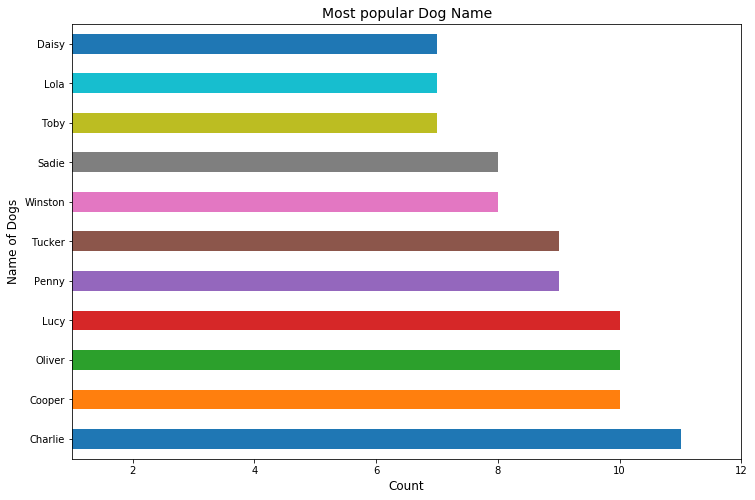

In [94]:
#plot to view most popular dog name
#I am going to plot the first 10 dog names
dog_name = tweets_archive_master['name'].value_counts()[0:11].plot(kind = 'barh');
dog_name.figure.set_size_inches(12, 8);
dog_name.set_title('Most popular Dog Name', color = 'black',fontsize = '14');
dog_name.set_xlabel('Count', fontsize = '12', color = 'black');
dog_name.set_ylabel('Name of Dogs', fontsize = '12', color = 'black');
dog_name.set_xlim(1, 12);

It can be seen that the most popular dog name is Charlie. 

### Insight 2: What is the count of dogs in different dog classes?

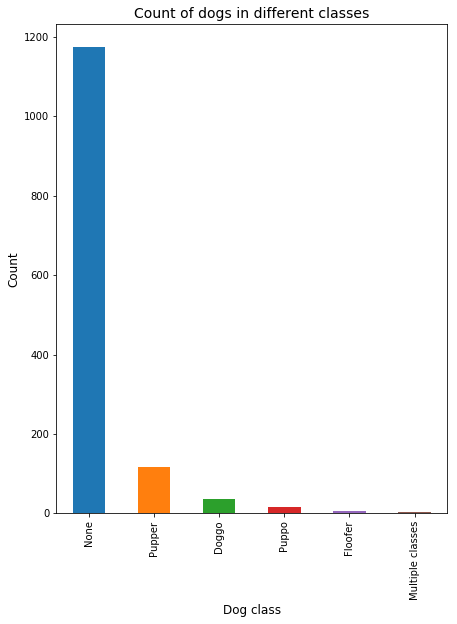

In [97]:
#plot to view the count of dogs in different dog classes
dog_class = tweets_archive_master['dog_class'].value_counts().plot(kind = 'bar');
dog_class.figure.set_size_inches(7,9);
dog_class.set_title('Count of dogs in different classes', color = 'black',fontsize = '14');
dog_class.set_xlabel('Dog class', fontsize = '12', color = 'black');
dog_class.set_ylabel('Count', fontsize = '12', color = 'black');


In [99]:
tweets_archive_master['dog_class'].value_counts()

None                1173
Pupper               117
Doggo                 36
Puppo                 15
Floofer                5
Multiple classes       4
Name: dog_class, dtype: int64

It can be seen that over a thousand dogs do not belong to any class, while there are dogs that belong to multiple classes.

### Insight 3: What is the most used twitter source?

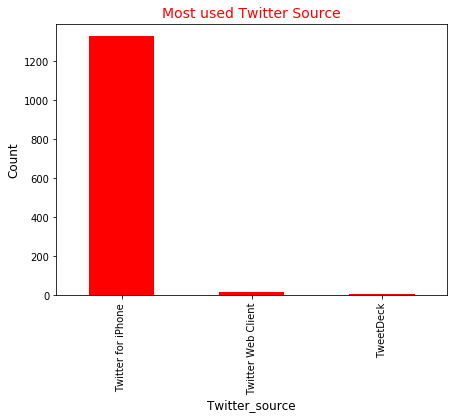

In [103]:
#plot to show the most used twitter source
tweet_source = tweets_archive_master['source_y'].value_counts().plot(kind = 'bar', color = 'red');
tweet_source.figure.set_size_inches(7,5);
tweet_source.set_title('Most used Twitter Source', color = 'red',fontsize = '14');
tweet_source.set_xlabel('Twitter_source', fontsize = '12', color = 'black');
tweet_source.set_ylabel('Count', fontsize = '12', color = 'black');

In [105]:
tweets_archive_master['source_x'].value_counts()

Twitter for iPhone    1325
Twitter Web Client      16
TweetDeck                9
Name: source_x, dtype: int64

In [106]:
tweets_archive_master['source_y'].value_counts()

Twitter for iPhone    1325
Twitter Web Client      16
TweetDeck                9
Name: source_y, dtype: int64

Twitter for iPhone is the most used source.

### Insight 4: What is the correlation between favorite count and retweet count

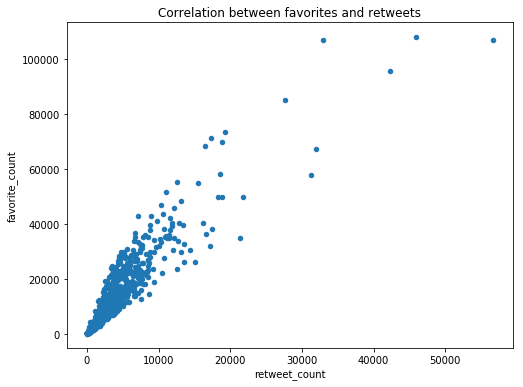

In [138]:
#correlation between favorite count and retweet count
tweets_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(8,6), title = 'Correlation between favorites and retweets');


In [139]:
tweets_archive_master['favorite_count'].corr(tweets_archive_master['retweet_count'])

0.92169156702225485

The plot above shows that there is a positive correlation (0.92) between favorites and retweets 